In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorama

import seaborn as sn
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [3]:
df = pd.read_csv(r"C:\Users\Mesut\Projekt TechLabs\Projekt mit Clean Daten\diabetes_clear_datas.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.shape

(253680, 22)

In [5]:
index_df = df.loc[0: , ['Diabetes_012', 'Smoker', 'PhysActivity', 'Age', 'BMI', 'Stroke', 'HeartDiseaseorAttack']]
index_df

,Diabetes_012,Smoker,PhysActivity,Age,BMI,Stroke,HeartDiseaseorAttack
0,0.0,1.0,0.0,9.0,40.0,0.0,0.0
1,0.0,1.0,1.0,7.0,25.0,0.0,0.0
2,0.0,0.0,0.0,9.0,28.0,0.0,0.0
3,0.0,0.0,1.0,11.0,27.0,0.0,0.0
4,0.0,0.0,1.0,11.0,24.0,0.0,0.0
...,...,...,...,...,...,...,...
253675,0.0,0.0,0.0,5.0,45.0,0.0,0.0
253676,2.0,0.0,0.0,11.0,18.0,0.0,0.0
253677,0.0,0.0,1.0,2.0,28.0,0.0,0.0
253678,0.0,0.0,0.0,7.0,23.0,0.0,0.0


In [8]:
index_df = df['Diabetes_012'].map({0.0:'Non_Diabetes', 1.0:'Pre-Diabetes', 2.0:'Diabetes_2'})
lookup_diabetes_012 = dict(zip(df.Diabetes_012.unique(), index_df.unique()))   
lookup_diabetes_012

{0.0: 'Non_Diabetes', 2.0: 'Diabetes_2', 1.0: 'Pre-Diabetes'}

<IPython.core.display.Javascript object>


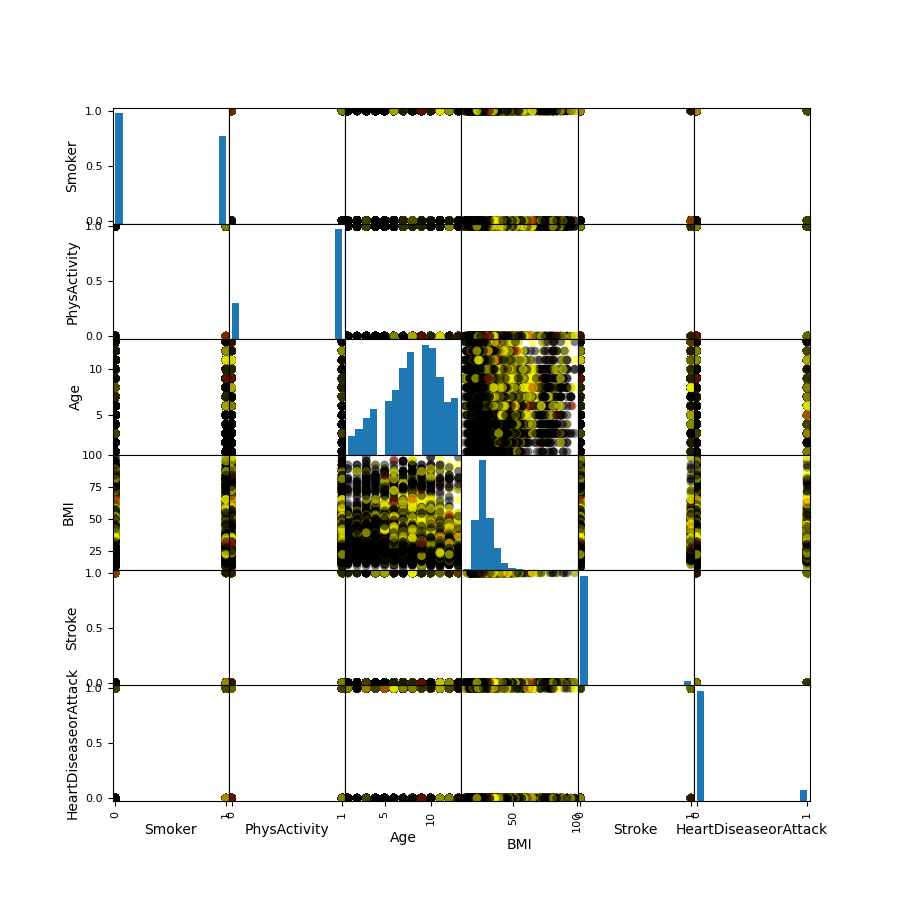

In [9]:
X = df[['Smoker', 'PhysActivity', 'Age', 'BMI', 'Stroke', 'HeartDiseaseorAttack']]
y = df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

y_train contains the target output corresponding to X_train values !


<IPython.core.display.Javascript object>


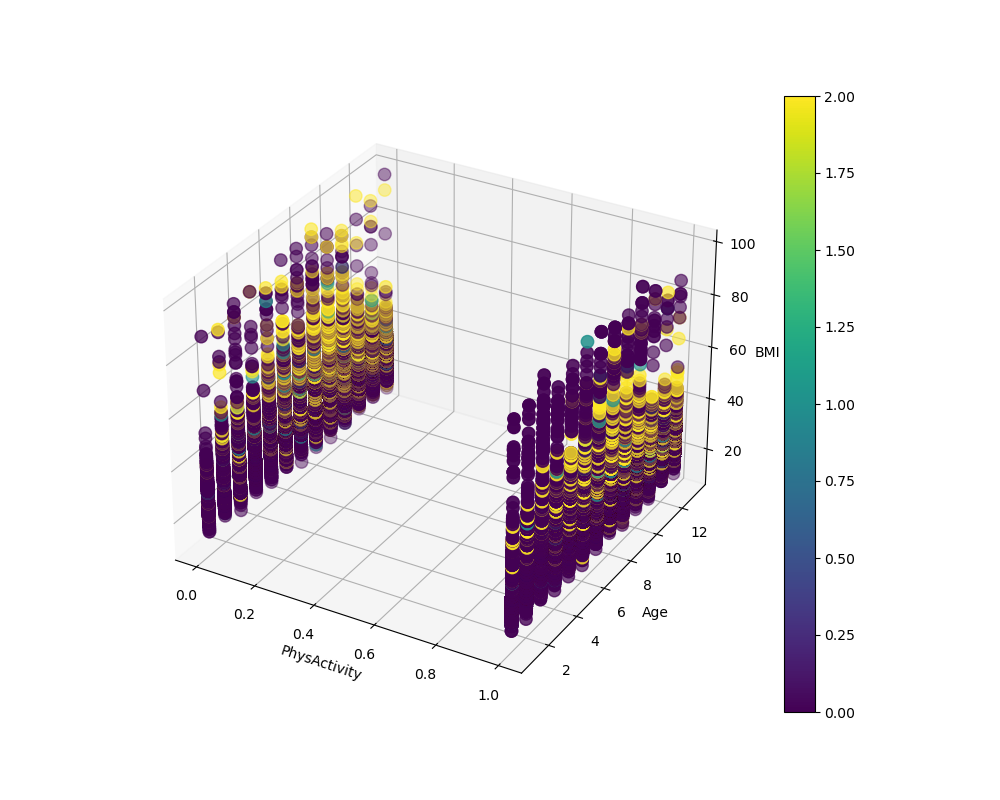

In [15]:
%matplotlib notebook

print("y_train contains the target output corresponding to X_train values !")
plt.figure(111, figsize=(10, 8))
ax = plt.axes(projection='3d')
figure = ax.scatter3D(X_train['PhysActivity'], X_train['Age'], X_train['BMI'], c = y_train,
              marker = 'o', s=80)
ax.set_xlabel('PhysActivity')
ax.set_ylabel('Age')
ax.set_zlabel('BMI')
plt.colorbar(figure)


<IPython.core.display.Javascript object>


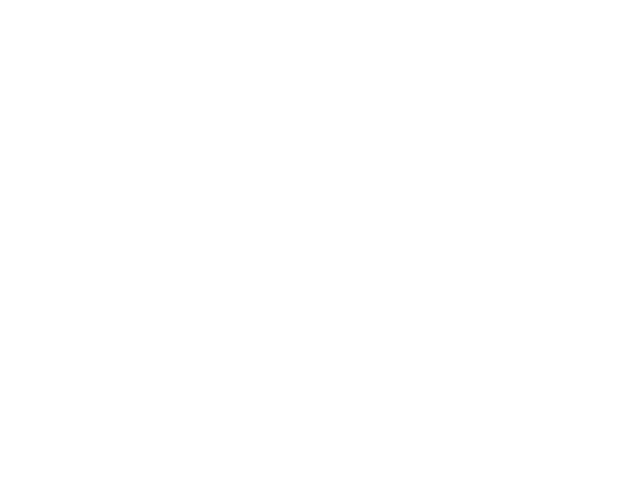

C:\Users\Ellen\AppData\Local\Temp\ipykernel_9080\1149498760.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(figure)


In [16]:
# plotting a 3D scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['PhysActivity'], X_train['Age'], X_train['BMI'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('PhysActivity')
ax.set_ylabel('Age')
ax.set_zlabel('BMI')
plt.show()
plt.colorbar(figure)
  
fig.suptitle("y_train contains the target output corresponding to X_train values !",  fontweight ="bold") 

#(What values we should find after training process!) 
# fig.suptitle("""matplotlib.figure.Figure.legend()
#function Example\n\n""", fontweight ="bold") 

plt.show()

In [17]:
# For this example, we use the Smoker, PhysicalActivity, and Age of each Diabetes instance
X = df[['Smoker', 'PhysActivity', 'BMI']]
y = df['Diabetes_012']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
knn.score(X_test, y_test)

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8274992116051719

In [21]:
# first example: a PhysicalActivity=1 ,Age=6, BMI=65
diabetes_prediction = knn.predict([[1, 6, 65]])
lookup_diabetes_012[diabetes_prediction[0]]

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


'Diabetes_2'

In [22]:
y_pred =  knn.predict(X_test)
y_pred[:10]

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0., 0., 0., 0., 2., 0., 0., 0., 0., 2.])

In [23]:
np.array(y_test)[:10]

array([0., 0., 0., 0., 2., 0., 0., 0., 2., 0.])

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, multilabel_confusion_matrix

print(confusion_matrix(y_test, y_pred))
print()
print(multilabel_confusion_matrix(y_test, y_pred))

[[51658     0  1627]
 [ 1061     0    72]
 [ 8180     0   822]]

[[[  894  9241]
  [ 1627 51658]]

 [[62287     0]
  [ 1133     0]]

 [[52719  1699]
  [ 8180   822]]]


In [25]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)


array([0., 1., 2.])

In [26]:
def plot(y_true, y_predictions):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
    return table

plot(y_test, y_pred)

,Predicted 0.0,Predicted 1.0,Predicted 2.0
Actual 0.0,51658,0,1627
Actual 1.0,1061,0,72
Actual 2.0,8180,0,822


<IPython.core.display.Javascript object>


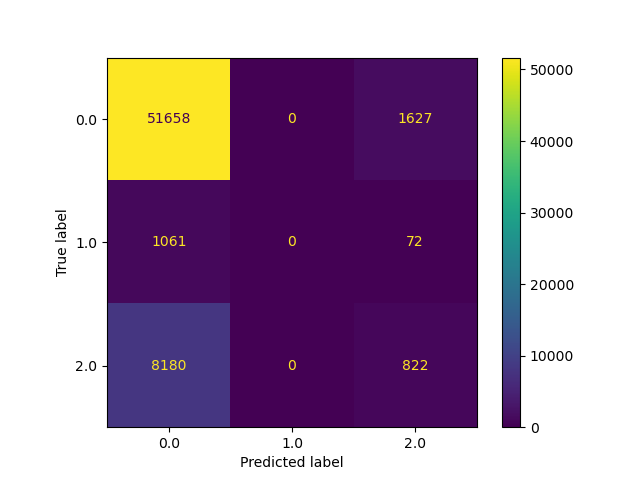

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# def plot2(y_true, y_predictions):
#    labels = unique_labels(y_test)
#    column = [f'Predicted {label}' for label in labels]
#    indices = [f'Actual {label}' for label in labels]
#    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
#plt.show()return sns.heatmap(table, annot=True, fmt='d' , cmap='YlGnBu')

#plot2(y_test, y_pred)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     53285
         1.0       0.00      0.00      0.00      1133
         2.0       0.33      0.09      0.14      9002

    accuracy                           0.83     63420
   macro avg       0.39      0.35      0.35     63420
weighted avg       0.76      0.83      0.78     63420



C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
tp0 = 51658
tn0 = 894
fp0 = 9241
fn0 = 1627

recall_0 = tp0/(tp0+fn0)
precision_0 = tp0/(tp0+fp0)
f1_score_0 =  (recall_0 * precision_0 / (recall_0 + precision_0) * 2)

print(f"Recall_no_diabetes : {recall_0} ")
print(f"Precision_no_diabetes : {precision_0} ")
print(f"F1_score_no_diabetes : {f1_score_0} ")

print()

tp1= 0
tn1 = 62287
fp1 = 0
fn1 = 1133

recall_1 = 0 
precision_1 = 0
f1_score_1 =  0

print(f"Recall_diabetes_1 : {recall_1} ")
print(f"Precision_diabetes_1 : {precision_1} ")
print(f"F1_score_diabetes_1 : {f1_score_1} ")

print()

tp2 = 832
tn2 = 52719
fp2 = 1699
fn2 = 8180

recall_2 = tp2/(tp2+fn2)
precision_2 = tp2/(tp2+fp2)
f1_score_2 =  (recall_2 * precision_2 / (recall_2 + precision_2) * 2)

print(f"Recall_diabetes_2 : {recall_2} ")
print(f"Precision_diabetes_2 : {precision_2} ")
print(f"F1_score_diabetes_2 : {f1_score_2} ")

Recall_no_diabetes : 0.9694660786337619 
Precision_no_diabetes : 0.8482569500320203 
F1_score_no_diabetes : 0.9048202900581518 

Recall_diabetes_1 : 0 
Precision_diabetes_1 : 0 
F1_score_diabetes_1 : 0 

Recall_diabetes_2 : 0.0923213493120284 
Precision_diabetes_2 : 0.32872382457526667 
F1_score_diabetes_2 : 0.14415663172485488 


In [32]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8274992116051719

In [33]:
precision = metrics.precision_score(y_test, y_pred, average=None)
precision

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.84825695, 0.        , 0.32606109])

In [34]:
recall_sensitivity = metrics.recall_score(y_test, y_pred, average=None)
recall_sensitivity

array([0.96946608, 0.        , 0.09131304])

In [35]:
recall_specificity = metrics.recall_score(y_test, y_pred, average=None)
recall_specificity

array([0.96946608, 0.        , 0.09131304])

In [36]:
F1_score = metrics.f1_score(y_test, y_pred, average=None)
F1_score

array([0.90482029, 0.        , 0.14267118])

In [37]:
analyse = [{'Accuracy :' : accuracy, 
       'Precision :' : precision, 
       'Recall-Sensitivity :' : recall_sensitivity, 
       'Recall-Specificity : ' : recall_specificity, 
       'F1-Score : ' : F1_score}]
list(analyse)


[{'Accuracy :': 0.8274992116051719,
  'Precision :': array([0.84825695, 0.        , 0.32606109]),
  'Recall-Sensitivity :': array([0.96946608, 0.        , 0.09131304]),
  'Recall-Specificity : ': array([0.96946608, 0.        , 0.09131304]),
  'F1-Score : ': array([0.90482029, 0.        , 0.14267118])}]

In [ ]:
LINEAR REGRESSION !

In [38]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [39]:
# For this example, we use the PhysicalActivity, Age and BMI of each Diabetes instance
X = df[['PhysActivity', 'Age', 'BMI']]
y = df['Diabetes_012']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.score(X_test, y_test))

# first example: a PhysicalActivity=1 ,Age=6, BMI=35
diabetes_prediction = linreg.predict([[1, 6, 65]])
print(diabetes_prediction)

diabetes_prediction_rounded = [np.round(x) for x in diabetes_prediction]
print(diabetes_prediction_rounded)

    
if diabetes_prediction_rounded == [0.0] :
    print(f'Fortunately you have {lookup_diabetes_012[diabetes_prediction_rounded[0]]} with your lifestyle ! Go on living this way !')
else:
    print(f'Unfortunately you have or you will have {lookup_diabetes_012[diabetes_prediction_rounded[0]]} with your lifestyle ! Please contact a physician for more information !')


0.09545606603212076
[1.02981564]
[1.0]
Unfortunately you have or you will have Pre-Diabetes with your lifestyle ! Please contact a physician for more information !


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
y_pred =  linreg.predict(X_test)
y_pred = np.round(y_pred, 0) #[np.round(x) for x in y_pred]
y_pred[:10]

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0.])

In [42]:
np.array(y_test)[:10]

array([0., 0., 0., 0., 2., 0., 0., 0., 2., 0.])

In [43]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report
import seaborn as sns
unique_labels(y_test)

def plot1(y_true, y_predictions):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
    return table

plot1(y_test, y_pred)

,Predicted 0.0,Predicted 1.0,Predicted 2.0
Actual 0.0,47660,5566,59
Actual 1.0,826,307,0
Actual 2.0,5815,3179,8


<IPython.core.display.Javascript object>


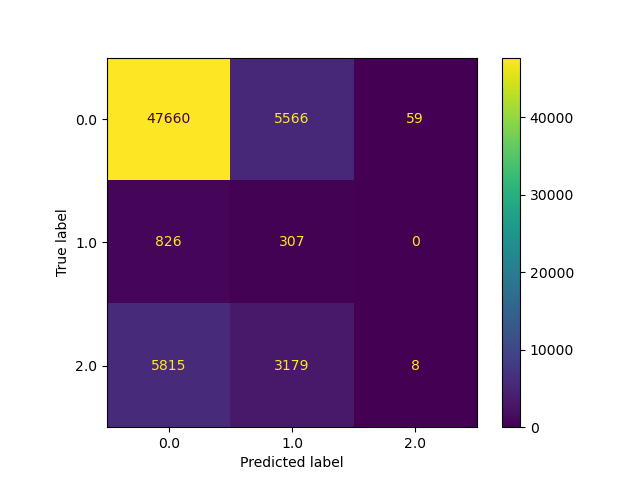

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

# def plot2(y_true, y_predictions):
#    labels = unique_labels(y_test)
#    column = [f'Predicted {label}' for label in labels]
#    indices = [f'Actual {label}' for label in labels]
#    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
#plt.show()return sns.heatmap(table, annot=True, fmt='d' , cmap='YlGnBu')

#plot2(y_test, y_pred)

# Logistic Regression !

In [46]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)
logreg

LogisticRegression()

In [47]:
logreg.score(X_test, y_test)

0.8386155786818038

In [48]:
# first example: a PhysicalActivity=1 ,Age=6, BMI=35
diabetes_prediction = logreg.predict([[1, 6, 65]])
print(diabetes_prediction)

if diabetes_prediction == [0.0] :
    print(f'Fortunately you have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Go on living this way !')
else:
    print(f'Unfortunately you have or you will have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Please contact a physician for more information !')

[2.]
Unfortunately you have or you will have Diabetes_2 with your lifestyle ! Please contact a physician for more information !


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
y_pred =  logreg.predict(X_test)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
np.array(y_test)[:10]

array([0., 0., 0., 0., 2., 0., 0., 0., 2., 0.])

In [51]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[52813     0   472]
 [ 1107     0    26]
 [ 8630     0   372]]

[[[  398  9737]
  [  472 52813]]

 [[62287     0]
  [ 1133     0]]

 [[53920   498]
  [ 8630   372]]]


In [52]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([0., 1., 2.])

In [53]:
def plot(y_true, y_predictions):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
    return table

plot(y_test, y_pred)

,Predicted 0.0,Predicted 1.0,Predicted 2.0
Actual 0.0,52813,0,472
Actual 1.0,1107,0,26
Actual 2.0,8630,0,372


<IPython.core.display.Javascript object>


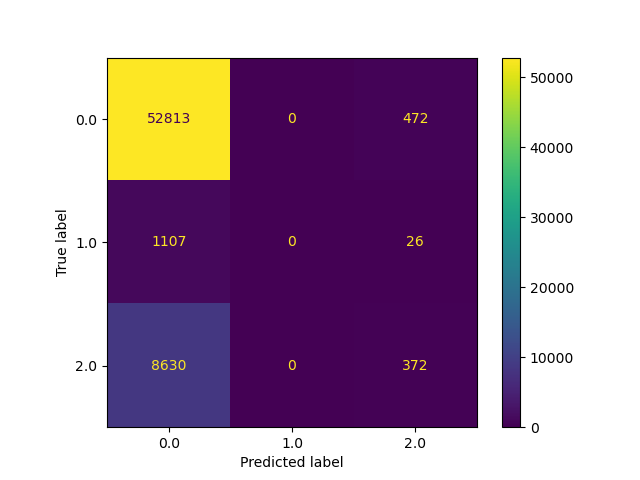

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

# def plot2(y_true, y_predictions):
#    labels = unique_labels(y_test)
#    column = [f'Predicted {label}' for label in labels]
#    indices = [f'Actual {label}' for label in labels]
#    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
#plt.show()return sns.heatmap(table, annot=True, fmt='d' , cmap='YlGnBu')

#plot2(y_test, y_pred)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     53285
         1.0       0.00      0.00      0.00      1133
         2.0       0.43      0.04      0.08      9002

    accuracy                           0.84     63420
   macro avg       0.42      0.34      0.33     63420
weighted avg       0.77      0.84      0.78     63420



C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn import metrics 

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8386155786818038

In [57]:
#precision = tp/(tp+fp)
precision = metrics.precision_score(y_test, y_pred, average = None)
precision

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.84433253, 0.        , 0.42758621])

In [58]:
#recall = tp/(tp+fn)
recall_sensitivity = metrics.recall_score(y_test, y_pred, average=None)
recall_sensitivity

array([0.99114197, 0.        , 0.04132415])

In [59]:
#recall(specificity) = tn/(tn+fp)
recall_specificity = metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred), average=None)
recall_specificity

array([0.03926986, 0.99114197])

In [60]:
#f1_score =  (recall * precision / (recall + precision) * 2)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
F1_score

array([0.91186602, 0.        , 0.07536467])

In [61]:
list([{'Accuracy :' : accuracy, 'Precision :' : precision, 'Recall-Sensitivity :' : recall_sensitivity, 'Recall-Specificity : ' : recall_specificity, 
       'F1-Score : ' : F1_score}])

[{'Accuracy :': 0.8386155786818038,
  'Precision :': array([0.84433253, 0.        , 0.42758621]),
  'Recall-Sensitivity :': array([0.99114197, 0.        , 0.04132415]),
  'Recall-Specificity : ': array([0.03926986, 0.99114197]),
  'F1-Score : ': array([0.91186602, 0.        , 0.07536467])}]

# Decision Tree !

In [62]:
from sklearn import tree

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

desctree = tree.DecisionTreeClassifier().fit(X_train, y_train)
desctree

DecisionTreeClassifier()

In [63]:
desctree.score(X_test, y_test)

0.8401292967518134

In [64]:
# first example: a PhysicalActivity=1 ,Age=6, BMI=35
diabetes_prediction = desctree.predict([[1, 6, 65]])
print(diabetes_prediction)

if diabetes_prediction == [0.0] :
    print(f'Fortunately you have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Go on living this way !')
else:
    print(f'Unfortunately you have or you will have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Please contact a physician for more information !')

[0.]
Fortunately you have Non_Diabetes with your lifestyle ! Go on living this way !


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [65]:
y_pred =  desctree.predict(X_test)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
np.array(y_test)[:10]

array([0., 0., 0., 0., 2., 0., 0., 0., 2., 0.])

In [67]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[53052     4   229]
 [ 1111     0    22]
 [ 8773     0   229]]

[[[  251  9884]
  [  233 53052]]

 [[62283     4]
  [ 1133     0]]

 [[54167   251]
  [ 8773   229]]]


In [68]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([0., 1., 2.])

In [69]:
def plot(y_true, y_predictions):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
    return table

plot(y_test, y_pred)

,Predicted 0.0,Predicted 1.0,Predicted 2.0
Actual 0.0,53052,4,229
Actual 1.0,1111,0,22
Actual 2.0,8773,0,229


<IPython.core.display.Javascript object>


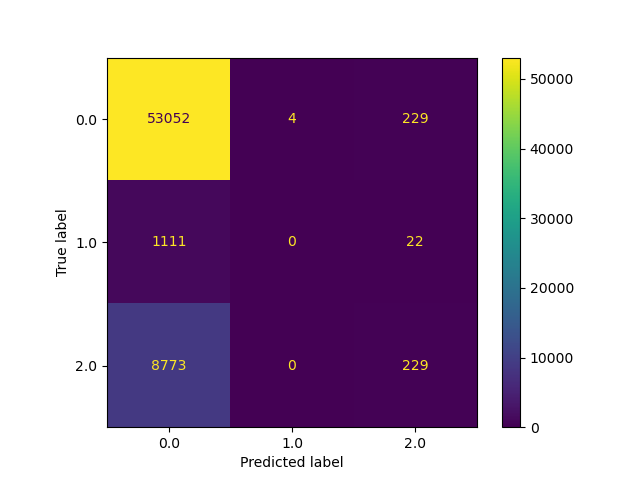

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

# def plot2(y_true, y_predictions):
#    labels = unique_labels(y_test)
#    column = [f'Predicted {label}' for label in labels]
#    indices = [f'Actual {label}' for label in labels]
#    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
#plt.show()return sns.heatmap(table, annot=True, fmt='d' , cmap='YlGnBu')

#plot2(y_test, y_pred)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     53285
         1.0       0.00      0.00      0.00      1133
         2.0       0.48      0.03      0.05      9002

    accuracy                           0.84     63420
   macro avg       0.44      0.34      0.32     63420
weighted avg       0.78      0.84      0.77     63420



In [72]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8401292967518134

In [73]:
#precision = tp/(tp+fp)
precision = metrics.precision_score(y_test, y_pred, average = None)
precision

array([0.84295157, 0.        , 0.47708333])

In [74]:
#recall = tp/(tp+fn)
recall_sensitivity = metrics.recall_score(y_test, y_pred, average=None)
recall_sensitivity

array([0.99562729, 0.        , 0.02543879])

In [75]:
#recall(specificity) = tn/(tn+fp)
recall_specificity = metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred), average=None)
recall_specificity

array([0.02476566, 0.99562729])

In [76]:
#f1_score =  (recall * precision / (recall + precision) * 2)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
F1_score

array([0.91295033, 0.        , 0.04830205])

In [77]:
list([{'Accuracy :' : accuracy, 'Precision :' : precision, 'Recall-Sensitivity :' : recall_sensitivity, 'Recall-Specificity : ' : recall_specificity, 
       'F1-Score : ' : F1_score}])

[{'Accuracy :': 0.8401292967518134,
  'Precision :': array([0.84295157, 0.        , 0.47708333]),
  'Recall-Sensitivity :': array([0.99562729, 0.        , 0.02543879]),
  'Recall-Specificity : ': array([0.02476566, 0.99562729]),
  'F1-Score : ': array([0.91295033, 0.        , 0.04830205])}]